In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from utils import return_best_chi2dof, chi2_zscore
from scipy.stats import chi2

In [2]:
reference = pd.read_csv("./runs/14May23_174631/5D_2000_500/Ref/t.txt", names=['i','t','time'], index_col=0)
dof = return_best_chi2dof(reference["t"])
data = pd.read_csv("./runs/14May23_174631/5D_2000_500/Thr 75%/t.txt", names=['i','t','time'], index_col=0)

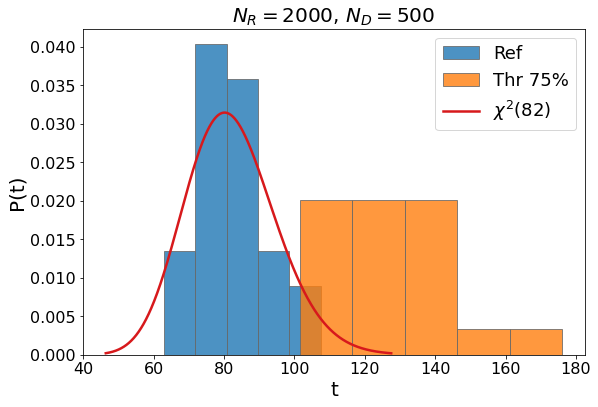

Z_chi2: 3.26524040557256


In [6]:
alpha=0.8
#bins = np.histogram(np.hstack((ref["t"],th_25["t"],th_50["t"],th_75["t"])), bins = 40)[1]
plt.figure(figsize=(9,6))
plt.hist(reference["t"], bins=5, density=True, label='Ref', edgecolor='dimgrey', alpha=alpha)
plt.hist(data["t"], bins=5, density=True, label="Thr 75%", edgecolor='dimgrey', alpha=alpha)
chi2_range = chi2.ppf(q=[0.0005,0.999], df=dof)
x = np.arange(chi2_range[0], chi2_range[1], .05)
chisq = chi2.pdf(x, df=dof)       
plt.plot(x, chisq, color='#d7191c', lw=2.5, label='$\chi^2(${}$)$'.format(dof))
plt.legend(fontsize=18)
plt.xlabel('t', fontsize=20)
plt.ylabel('P(t)', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("$N_R=2000$, $N_D=500$", fontsize=20)
#plt.savefig("./runs_paper/st_scaler/160123_1700/5D_2000_500/hist_t_thr.pdf", bbox_inches='tight')
plt.show()

print("Z_chi2: {}".format(np.nanmedian(chi2_zscore(data["t"],dof))))